Most existing approaches to visual odometry are based on the following stages.

1. Acquire input images
2. Image correction: apply image processing techniques for lens distortion removal, etc.
3. Feature detection: define interest operators, and match features across frames and construct optical flow field.
       
4. Check flow field vectors for potential tracking errors and remove outliers.
5. Estimation of the camera motion from the optical flow.
       
6. Periodic repopulation of trackpoints to maintain coverage across the image.

Executing the code:
   
1. Initialize the dataset using Script 1.
2. Perform VO using Script 2.
4. Visualise the MSE using Script 5 after the execution of Script 2.

Script 3 is for recording the frames per second. No other part of the program depends on it, and if executed takes 20-30 minutes to finish. 

Script 4 does not depend on other scripts, it can be ran at any time, and it is for plotting the FPS graph.
    

Script 1: Gathering the input images from the locally saved KITTI dataset. 

In [1]:
################################KITTI Dataset################################
#adapted from https://github.com/uoip/monoVO-python 
%run pinhole_camera.py

##kitti setup
poses_dir = 'dataset/poses/00.txt' #for ground truth
img_dir = 'dataset/sequences/00/image_0/'
cam = PinholeCamera(1241.0, 376.0, 718.8560, 718.8560, 607.1928, 185.2157)
with open(poses_dir) as f: poses = f.readlines()#poses
print "kitti loaded."

kitti loaded.


Script 2: Performing the visual odometry

In [48]:
################################Visual Odometry################################

vo = VisualOdometry(cam, poses_dir)

traj = np.zeros((600,600,3), dtype=np.uint8)

predicted, actual = [],[]
# predicted = np.array(predicted)
# actual = np.array(actual)

frames_arr= []
import time
start = time.time()
frames = 1000
#drawing trajectories for each frame starting form the 3rd
for img_id in range(frames):
    img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
    
    vo.update(img, img_id)

    cur_t = vo.cur_t
    
    if(img_id > 2): 
        x, y, z = cur_t[0], cur_t[1], cur_t[2]
    else: 
        x, y, z = 0., 0., 0.
        
    #offset so the 2 trajectories do not overlap
    x_offset, y_offset = 0, 0
    draw_x, draw_y = int(x)+(290-x_offset), int(z)+(90-y_offset)
    true_x, true_y = int(vo.trueX)+290, int(vo.trueZ)+90
    
    #for drawing error line
    predicted.append((x,y))
    actual.append((vo.trueX, vo.trueY))
    
    
    #openCV uses BGR colour schemes as tuples, e.g (255,0,0) is blue
    #predicted trajectory in 
    cv2.circle(traj, (draw_x,draw_y), 1, (0,255,0), 1)
    #actual trajectory
    cv2.circle(traj, (true_x,true_y), 1, (0,0,255), 1)
    cv2.rectangle(traj, (10, 20), (600, 60), (0,0,0), -1)
    
    #disaplying the current coordinates in the window     
    text = "Coordinates: x=%2fm y=%2fm z=%2fm"%(x,y,z)
    cv2.putText(traj, text, (20,40), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    #disaplying the current frame in the window     
    frame = "Frame: " + str(img_id) + " FPS: " + str(curr_fps)
    cv2.putText(traj, frame, (20,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    cv2.rectangle(traj, (10, 40), (600, 60), (0,0,0), -1)    
    
    sec = time.time()
    curr_secs = sec - start
    curr_fps = img_id/curr_secs
    frames_arr.append(curr_fps)
    
    #disaplying the current fps in the window     
    fps = "FPS: " + str(curr_fps)
    cv2.putText(traj, frame, (30,60), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 1, 8)
    
    cv2.imshow('Road facing camera', img)
    cv2.imshow('Trajectory', traj)
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

# cv2.imwrite('map.png', traj)
cv2.destroyAllWindows()
cv2.waitKey(1)

return predicted,actual

-1

Script 3

This part of the code deals with testing the performance in terms of frames per second(FPS) for 20 iterations and a random amount of frames from a range between 200 and 2000.

All the image visualisation has been removed.

In [ ]:
import numpy as np
import random
import time

vo = VisualOdometry(cam, poses_dir)

total_fps = []
iterations=20

print "Starting the 20 iterations"
for i in range(iterations):
    #range is 200-2000 frames
    frames = random.randint(200,2000)    
    start = time.time()
    frames_arr= []
    #reading the images and performing VO
    for img_id in range(frames):
        img = cv2.imread(img_dir+str(img_id).zfill(6)+'.png', 0)
        vo.update(img, img_id)
        print "Frame "+str(img_id)+"/"+str(frames)+" from iteration "+str(i)+" was proccessed."
    #calculating the FPS
    end = time.time()
    seconds = end - start
    fps = frames/seconds
    total_fps.append((frames,fps))
    
print (np.array(total_fps)).reshape(20,2)

Script 4: Plotting the graphs for the FPS results from the two machines.

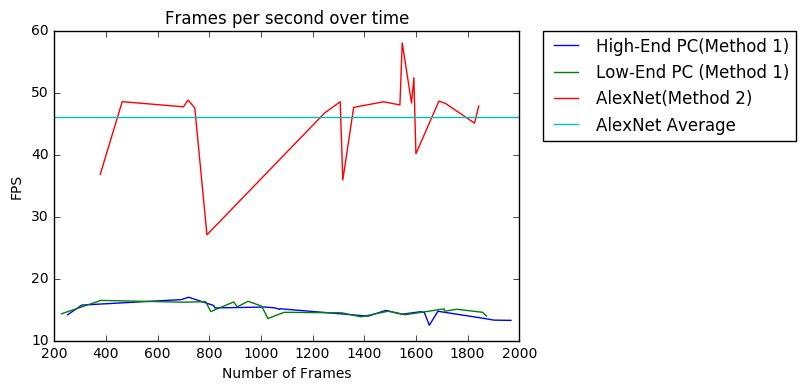

In [78]:
import matplotlib.pyplot as plt
import numpy as np

#the tuple lists from the two machines
#for (x,y), x=number of frames, y=FPS
#all values were obtained by runnig 20 iterations of the VO test code for each of the lists below
high_end = [(1415, 13.9256576794853), (1633, 14.49185332237826), (692, 16.597510342312937), (1902, 13.28444212071557), (1968, 13.246013748166588), (817, 15.644747387887113), (1858, 13.601159544429823), (1547, 14.241132669300056), (720, 16.981532516090148), (1053, 15.264409145525736), (1074, 15.122074834207996), (1619, 14.649727644408387), (307, 15.714578203838439), (1017, 15.396027614268148), (1072, 15.03000395066713), (1685, 14.71474354165605), (1483, 14.854063609679645), (1652, 12.453919727322866), (822, 15.258390264332748), (252, 14.15650815690624)]
low_end = [(908, 15.416195359079301), (1387, 13.823327208123809), (806, 14.678643231174892), (1709, 15.096476461535536), (895, 16.222218979230302), (1873, 13.937914172324946), (1090, 14.54724361525289), (1493, 14.72498274726146), (381, 16.468721997640543), (1003, 15.538178186024538), (786, 16.25333398956898), (1858, 14.549253998647432), (698, 16.17969343116562), (1711, 14.733346877738205), (228, 14.310891946105043), (1313, 14.46601040546894), (1027, 13.550017874333518), (1557, 14.154111818030644), (1759, 15.03512430265126), (950, 16.33352216314256)]
deep_end = [(791, 27.04319265698128), (378, 36.78669900632446), (1317, 35.884312978810065), (1600, 40.121536054886185), (1475, 48.50281829310458), (1547, 57.99584848867834), (1592, 52.373840776552576), (1307, 48.513468898285545), (1247, 46.712585667958415), (1827, 45.05322939862442), (718, 48.77531176574092), (1359, 47.597558103594345), (1714, 48.247856842118544), (744, 47.51741021950383), (463, 48.52152919306825), (1689, 48.61284560394139), (700, 47.690765845874154), (1538, 47.99538578100847), (1843, 47.81908910801715), (1583, 48.31414759492721)]

#sorting the values to enable visualisation and comparison 
high_sr = sorted(high_end)
low_sr = sorted(low_end)
deep_sr = sorted(deep_end)

#seperating the frames and the FPS for each list
x_high = [x[0] for x in high_sr]
y_high = [x[1] for x in high_sr]

x_low = [x[0] for x in low_sr]
y_low = [x[1] for x in low_sr]

x_deep = [x[0] for x in deep_sr]
y_deep = [x[1] for x in deep_sr]

#average fps for alexnet
average = np.sum(y_deep)/len(y_deep)

#plotting the graph to visualise the lists
plt.plot(x_high,y_high,label='High-End PC(Method 1)')
plt.plot(x_low,y_low,label='Low-End PC (Method 1)')
plt.plot(x_deep,y_deep,label='AlexNet(Method 2)')
plt.plot((200, 2000), (average,average), label="AlexNet Average")
plt.xlabel('Number of Frames')
plt.ylabel('FPS')
plt.title('Frames per second over time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #to place legend on the side
plt.show()

Script 5
This is a graph showing the error value of the predicted trajectory from VO, compared to the actual trajectory from the provided files, as the number of frames increase.

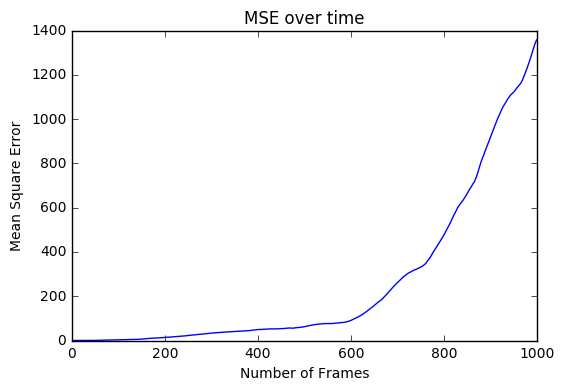

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#copying the lists from the VO method at the top
pred = np.copy(predicted)
act = np.copy(actual)

#MSE for all the frames
total_error=[]
for i in range(len(pred)): 
    total_error.append(mean_squared_error(pred[i],act[i]))
    
#plotting the graph to visualise the mean square error
plt.plot(total_error)
plt.xlabel('Number of Frames')
plt.ylabel('Mean Square Error')
plt.title('MSE over time')
plt.show()